In [17]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Upload all data being compared.

In [18]:
hpi=pd.read_csv('../data/hpi_2000-2020.csv')
zip0=pd.read_csv('../data/zip0.csv')
zip1=pd.read_csv('../data/zip1.csv')
zip2=pd.read_csv('../data/zip2.csv')
zip3=pd.read_csv('../data/zip3.csv')
zip4=pd.read_csv('../data/zip4.csv')
zip5=pd.read_csv('../data/zip5.csv')
zip6=pd.read_csv('../data/zip6.csv')
zip7=pd.read_csv('../data/zip7.csv')
zip8=pd.read_csv('../data/zip8.csv')
zip9=pd.read_csv('../data/zip9.csv')

2. Seperate HPI by single digit zip.

In [19]:
hpi_zip0=hpi[hpi['one-digit ZIP']==0]
hpi_zip1=hpi[hpi['one-digit ZIP']==1]
hpi_zip2=hpi[hpi['one-digit ZIP']==2]
hpi_zip3=hpi[hpi['one-digit ZIP']==3]
hpi_zip4=hpi[hpi['one-digit ZIP']==4]
hpi_zip5=hpi[hpi['one-digit ZIP']==5]
hpi_zip6=hpi[hpi['one-digit ZIP']==6]
hpi_zip7=hpi[hpi['one-digit ZIP']==7]
hpi_zip8=hpi[hpi['one-digit ZIP']==8]
hpi_zip9=hpi[hpi['one-digit ZIP']==9]

3. Merge data on matching zips.

In [20]:
zip0_hpi_merge = pd.merge(hpi_zip0,zip0,on='Year')
zip1_hpi_merge = pd.merge(hpi_zip1,zip1,on='Year')
zip2_hpi_merge = pd.merge(hpi_zip2,zip2,on='Year')
zip3_hpi_merge = pd.merge(hpi_zip3,zip3,on='Year')
zip4_hpi_merge = pd.merge(hpi_zip4,zip4,on='Year')
zip5_hpi_merge = pd.merge(hpi_zip5,zip5,on='Year')
zip6_hpi_merge = pd.merge(hpi_zip6,zip6,on='Year')
zip7_hpi_merge = pd.merge(hpi_zip7,zip7,on='Year')
zip8_hpi_merge = pd.merge(hpi_zip8,zip8,on='Year')
zip9_hpi_merge = pd.merge(hpi_zip9,zip9,on='Year')

4. Combine all data back to common dataframe.

In [21]:
ZIP_VS_HPI = pd.concat([zip0_hpi_merge,zip1_hpi_merge,zip2_hpi_merge,zip3_hpi_merge,zip4_hpi_merge,zip5_hpi_merge,zip6_hpi_merge,zip7_hpi_merge,zip8_hpi_merge,zip9_hpi_merge])

5. Rename columns for clarity. 

In [22]:
new_column_names = {'HPI':'1975 HPI base','Annual Change (%)':'Year by year HPI percent change','percent_change':'employment year by year percent change'}

In [23]:
ZIP_VS_HPI.rename(columns=new_column_names,inplace=True)

In [24]:
ZIP_VS_HPI = ZIP_VS_HPI.fillna(0)

In [25]:
ZIP_VS_HPI = ZIP_VS_HPI.drop(['1975 HPI base','Year by year HPI percent change'],axis=1)

6. Create pivot tables for use in graphs.

In [26]:
HPI_2000_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='HPI with 2000 base', index='Year', columns='one-digit ZIP')
employment_percent_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='employment_by_thosands', index='Year', columns='one-digit ZIP')

7. Create some base visuals for possible use.

<AxesSubplot:xlabel='Year'>

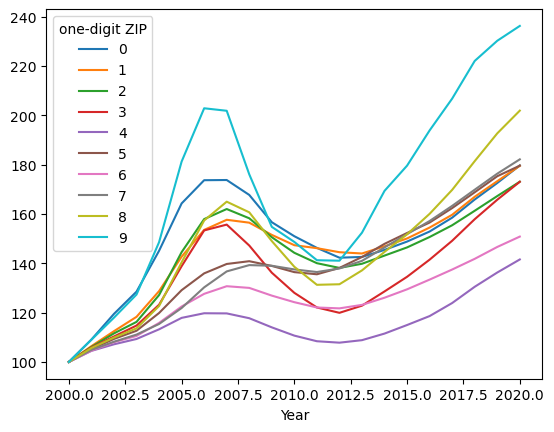

In [27]:
HPI_2000_pivot_table.plot(kind='line')

<AxesSubplot:xlabel='Year'>

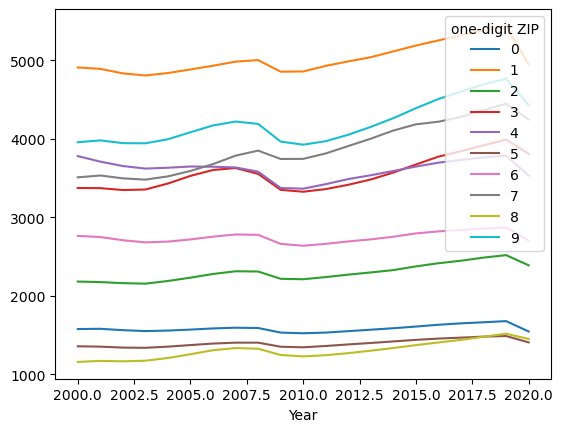

In [28]:
employment_percent_pivot_table.plot(kind='line')

In [37]:
HPI_Percent_change_since_2000_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='Percent change since 2000', index='Year', columns='one-digit ZIP')

In [44]:
colors=['pink', 'dark yellow', 'dark blue', 'orange','light blue','purple','green','dark pink','yellow','blue']

<AxesSubplot:xlabel='Year'>

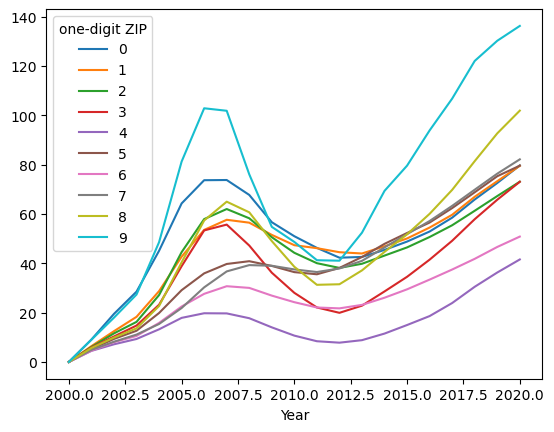

In [48]:
HPI_Percent_change_since_2000_pivot_table.plot(kind='line')

In [29]:
ZIP_VS_HPI[ZIP_VS_HPI['Year']==2019]

,one-digit ZIP,Year,HPI with 2000 base,Percent change since 2000,Percent change since 2010,HPI year by year percent change since 2000,employment_by_thosands,employment year by year percent change,employment percent change since 2000,employment percent change since 2010
19,0,2019,172.581688,72.581688,14.299783,4.036987,1677.926190,0.899280,6.420050,10.178464
19,1,2019,173.314167,73.314167,14.784899,3.781909,5440.691667,1.016223,10.791085,11.948644
19,2,2019,167.281429,67.281429,10.789454,3.697384,2518.705556,1.256134,15.423117,13.883766
19,3,2019,165.792667,65.792667,9.803456,5.000148,3990.953333,1.838395,18.259638,19.957238
19,4,2019,136.268172,36.268172,-9.750434,4.432790,3785.795833,0.559969,0.113270,12.470052
19,5,2019,175.331512,75.331512,16.120974,3.859005,1487.375000,0.468517,9.623074,10.665152
19,6,2019,146.637209,46.637209,-2.883084,3.398996,2872.693750,0.486146,3.925117,8.865789
19,7,2019,176.364111,76.364111,16.804859,3.827132,4448.735417,1.852370,26.712184,18.762263
19,8,2019,192.715342,92.715342,27.634178,6.208751,1516.760714,2.579877,31.021068,23.502264
19,9,2019,230.280000,130.280000,52.513018,3.685095,4768.461667,1.529106,20.477053,21.427647


In [30]:
year2020 = ZIP_VS_HPI[ZIP_VS_HPI['Year']==2020]
years2010_2020 = ZIP_VS_HPI[ZIP_VS_HPI['Year']>=2010]
years2000_2010 = ZIP_VS_HPI[ZIP_VS_HPI['Year']<=2010]

In [31]:
years2000_2010['employment year by year percent change'].mean()

-0.07583171238471612

In [32]:
years2010_2020['employment year by year percent change'].mean()

0.6870299144842564

In [33]:
year2020['employment percent change since 2000'].mean()

7.445616678972295

In [34]:
ZIP_VS_HPI['employment year by year percent change'].mean()

0.3465122619820257

In [35]:
year2020['Percent change since 2000'].mean()

79.78939357049266

In [36]:
ZIP_VS_HPI.to_csv('../data/ZIP_VS_HPI.csv',index=False)